In [1]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from xgboost import XGBClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [2]:
import pandas as pd
dataset_df = pd.read_csv(f"/content/drive/MyDrive/aigames_data/train_wind_clean_v4.csv")
dataset_df

,observation_id,route_id,timestamp,status,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,skyc1,skyl1,feel,airport,route_type,direction,angle_diff
0,0,LFK2 LFK,2020-05-08 14:01:17+00:00,0.0,82.9,70.0,65.13,260.0,8.0,0.00,29.91,1012.6,10.0,BKN,2700.0,86.95,KIAH,DEPARTURE,27,0.705556
1,185,LFK2 LFK,2020-07-31 19:36:14+00:00,0.0,96.1,71.1,44.61,220.0,11.0,0.00,29.92,1013.0,10.0,SCT,5000.0,104.00,KIAH,DEPARTURE,27,0.927778
2,232,LFK2 LFK,2020-06-25 11:34:00+00:00,0.0,73.0,71.1,93.77,260.0,5.0,0.44,29.91,0.0,4.0,FEW,500.0,73.00,KIAH,DEPARTURE,27,0.705556
3,301,LFK2 LFK,2020-06-25 11:36:22+00:00,0.0,73.0,71.1,93.77,260.0,5.0,0.44,29.91,0.0,4.0,FEW,500.0,73.00,KIAH,DEPARTURE,27,0.705556
4,369,LFK2 LFK,2020-08-28 20:54:46+00:00,0.0,97.0,77.0,52.90,160.0,13.0,0.00,29.79,1008.7,10.0,BKN,4500.0,112.62,KIAH,DEPARTURE,27,0.738889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42230,68910,YUYUN BEREE1,2021-03-23 13:45:51+00:00,1.0,51.1,39.9,65.38,230.0,9.0,0.00,29.76,1007.4,10.0,FEW,25000.0,51.10,KDFW,ARRIVAL,202,0.155556
42231,68911,YUYUN BEREE1,2021-03-26 04:28:09+00:00,1.0,59.0,42.1,53.40,100.0,3.0,0.00,29.90,1012.0,10.0,FEW,25000.0,59.00,KDFW,ARRIVAL,202,0.566667
42232,68913,YUYUN BEREE1,2021-05-27 09:27:49+00:00,1.0,75.9,72.0,87.73,190.0,13.0,0.00,29.99,1014.6,10.0,BKN,1300.0,75.90,KDFW,ARRIVAL,202,0.066667
42233,68914,YUYUN BEREE1,2021-04-15 11:25:46+00:00,1.0,57.0,52.0,83.33,60.0,18.0,0.00,30.03,0.0,10.0,SCT,900.0,57.00,KDFW,ARRIVAL,202,0.788889


In [3]:
# Checking for missing values
df = dataset_df
df.isnull().sum()

observation_id    0
route_id          0
timestamp         0
status            0
tmpf              0
dwpf              0
relh              0
drct              0
sknt              0
p01i              0
alti              0
mslp              0
vsby              0
skyc1             0
skyl1             0
feel              0
airport           0
route_type        0
direction         0
angle_diff        0
dtype: int64

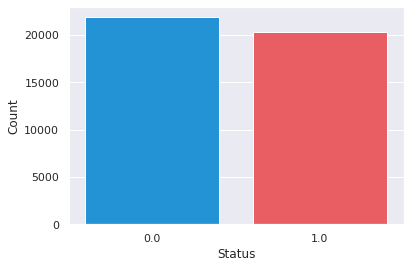

In [4]:
sns.set(style="darkgrid")
ax = sns.countplot(x="status", data=df, palette=sns.xkcd_palette(["azure", "light red"]))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [5]:
# Data preprocessing
# Label encoder for route_id
le = LabelEncoder()
df['route_id'] = le.fit_transform(df['route_id'])

le2 = LabelEncoder()
df['skyc1'] = le2.fit_transform(df['skyc1'])

le3 = LabelEncoder()
df['airport'] = le3.fit_transform(df['airport'])

le4 = LabelEncoder()
df['route_type'] = le4.fit_transform(df['route_type'])
df.head()

,observation_id,route_id,timestamp,status,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,skyc1,skyl1,feel,airport,route_type,direction,angle_diff
0,0,66,2020-05-08 14:01:17+00:00,0.0,82.9,70.0,65.13,260.0,8.0,0.00,29.91,1012.6,10.0,0,2700.0,86.95,1,1,27,0.705556
1,185,66,2020-07-31 19:36:14+00:00,0.0,96.1,71.1,44.61,220.0,11.0,0.00,29.92,1013.0,10.0,4,5000.0,104.00,1,1,27,0.927778
2,232,66,2020-06-25 11:34:00+00:00,0.0,73.0,71.1,93.77,260.0,5.0,0.44,29.91,0.0,4.0,2,500.0,73.00,1,1,27,0.705556
3,301,66,2020-06-25 11:36:22+00:00,0.0,73.0,71.1,93.77,260.0,5.0,0.44,29.91,0.0,4.0,2,500.0,73.00,1,1,27,0.705556
4,369,66,2020-08-28 20:54:46+00:00,0.0,97.0,77.0,52.90,160.0,13.0,0.00,29.79,1008.7,10.0,0,4500.0,112.62,1,1,27,0.738889


In [6]:
# Extract date and time
df["date"] = [value.split("+")[0].split(" ")[0] for value in df["timestamp"].values]
df["time"] = [value.split("+")[0].split(" ")[1] for value in df["timestamp"].values]
df.head()

,observation_id,route_id,timestamp,status,tmpf,dwpf,relh,drct,sknt,p01i,...,vsby,skyc1,skyl1,feel,airport,route_type,direction,angle_diff,date,time
0,0,66,2020-05-08 14:01:17+00:00,0.0,82.9,70.0,65.13,260.0,8.0,0.00,...,10.0,0,2700.0,86.95,1,1,27,0.705556,2020-05-08,14:01:17
1,185,66,2020-07-31 19:36:14+00:00,0.0,96.1,71.1,44.61,220.0,11.0,0.00,...,10.0,4,5000.0,104.00,1,1,27,0.927778,2020-07-31,19:36:14
2,232,66,2020-06-25 11:34:00+00:00,0.0,73.0,71.1,93.77,260.0,5.0,0.44,...,4.0,2,500.0,73.00,1,1,27,0.705556,2020-06-25,11:34:00
3,301,66,2020-06-25 11:36:22+00:00,0.0,73.0,71.1,93.77,260.0,5.0,0.44,...,4.0,2,500.0,73.00,1,1,27,0.705556,2020-06-25,11:36:22
4,369,66,2020-08-28 20:54:46+00:00,0.0,97.0,77.0,52.90,160.0,13.0,0.00,...,10.0,0,4500.0,112.62,1,1,27,0.738889,2020-08-28,20:54:46


In [7]:
# Encode date
from datetime import datetime

def day_of_year(y, m, d):
    return (datetime(y, m, d) - datetime(y, 1, 1)).days + 1

def day_of_week(y, m, d):
    return datetime(y, m, d).weekday()

days_of_week = []
for date in df["date"].values:
  year, month, day = [int(x) for x in date.split("-")]
  days_of_week += [day_of_week(year,month,day)]

df["day_of_week"] = days_of_week
df.head()

,observation_id,route_id,timestamp,status,tmpf,dwpf,relh,drct,sknt,p01i,...,skyc1,skyl1,feel,airport,route_type,direction,angle_diff,date,time,day_of_week
0,0,66,2020-05-08 14:01:17+00:00,0.0,82.9,70.0,65.13,260.0,8.0,0.00,...,0,2700.0,86.95,1,1,27,0.705556,2020-05-08,14:01:17,4
1,185,66,2020-07-31 19:36:14+00:00,0.0,96.1,71.1,44.61,220.0,11.0,0.00,...,4,5000.0,104.00,1,1,27,0.927778,2020-07-31,19:36:14,4
2,232,66,2020-06-25 11:34:00+00:00,0.0,73.0,71.1,93.77,260.0,5.0,0.44,...,2,500.0,73.00,1,1,27,0.705556,2020-06-25,11:34:00,3
3,301,66,2020-06-25 11:36:22+00:00,0.0,73.0,71.1,93.77,260.0,5.0,0.44,...,2,500.0,73.00,1,1,27,0.705556,2020-06-25,11:36:22,3
4,369,66,2020-08-28 20:54:46+00:00,0.0,97.0,77.0,52.90,160.0,13.0,0.00,...,0,4500.0,112.62,1,1,27,0.738889,2020-08-28,20:54:46,4


In [8]:
times_float = []
for time in df["time"]:
  hour, minutes, seconds = [float(x) for x in time.split(":")]
  time_float = hour + minutes / 60.0 + seconds / 60.0 / 60.0
  times_float += [time_float]

df["time_float"] = times_float

df = df.sort_values(by="date")
df.head()

,observation_id,route_id,timestamp,status,tmpf,dwpf,relh,drct,sknt,p01i,...,skyl1,feel,airport,route_type,direction,angle_diff,date,time,day_of_week,time_float
32738,54338,90,2020-01-01 15:39:39+00:00,1.0,54.0,37.9,54.34,130.0,7.0,0.0,...,4900.0,54.0,1,1,221,0.505556,2020-01-01,15:39:39,2,15.660833
35079,57129,92,2020-01-01 15:37:14+00:00,1.0,54.0,37.9,54.34,130.0,7.0,0.0,...,4900.0,54.0,1,1,221,0.505556,2020-01-01,15:37:14,2,15.620556
34845,56786,92,2020-01-01 15:37:39+00:00,1.0,54.0,37.9,54.34,130.0,7.0,0.0,...,4900.0,54.0,1,1,221,0.505556,2020-01-01,15:37:39,2,15.627500
19192,29915,84,2020-01-01 15:45:18+00:00,1.0,54.0,37.9,54.34,130.0,7.0,0.0,...,4900.0,54.0,1,0,115,0.083333,2020-01-01,15:45:18,2,15.755000
28195,40623,42,2020-01-01 15:39:50+00:00,1.0,54.0,37.9,54.34,130.0,7.0,0.0,...,4900.0,54.0,1,1,116,0.077778,2020-01-01,15:39:50,2,15.663889


In [9]:
df_reduced = df.drop(["timestamp", "date", "time"], axis=1)
df_reduced.head()

,observation_id,route_id,status,tmpf,dwpf,relh,drct,sknt,p01i,alti,...,vsby,skyc1,skyl1,feel,airport,route_type,direction,angle_diff,day_of_week,time_float
32738,54338,90,1.0,54.0,37.9,54.34,130.0,7.0,0.0,30.08,...,7.0,3,4900.0,54.0,1,1,221,0.505556,2,15.660833
35079,57129,92,1.0,54.0,37.9,54.34,130.0,7.0,0.0,30.08,...,7.0,3,4900.0,54.0,1,1,221,0.505556,2,15.620556
34845,56786,92,1.0,54.0,37.9,54.34,130.0,7.0,0.0,30.08,...,7.0,3,4900.0,54.0,1,1,221,0.505556,2,15.627500
19192,29915,84,1.0,54.0,37.9,54.34,130.0,7.0,0.0,30.08,...,7.0,3,4900.0,54.0,1,0,115,0.083333,2,15.755000
28195,40623,42,1.0,54.0,37.9,54.34,130.0,7.0,0.0,30.08,...,7.0,3,4900.0,54.0,1,1,116,0.077778,2,15.663889


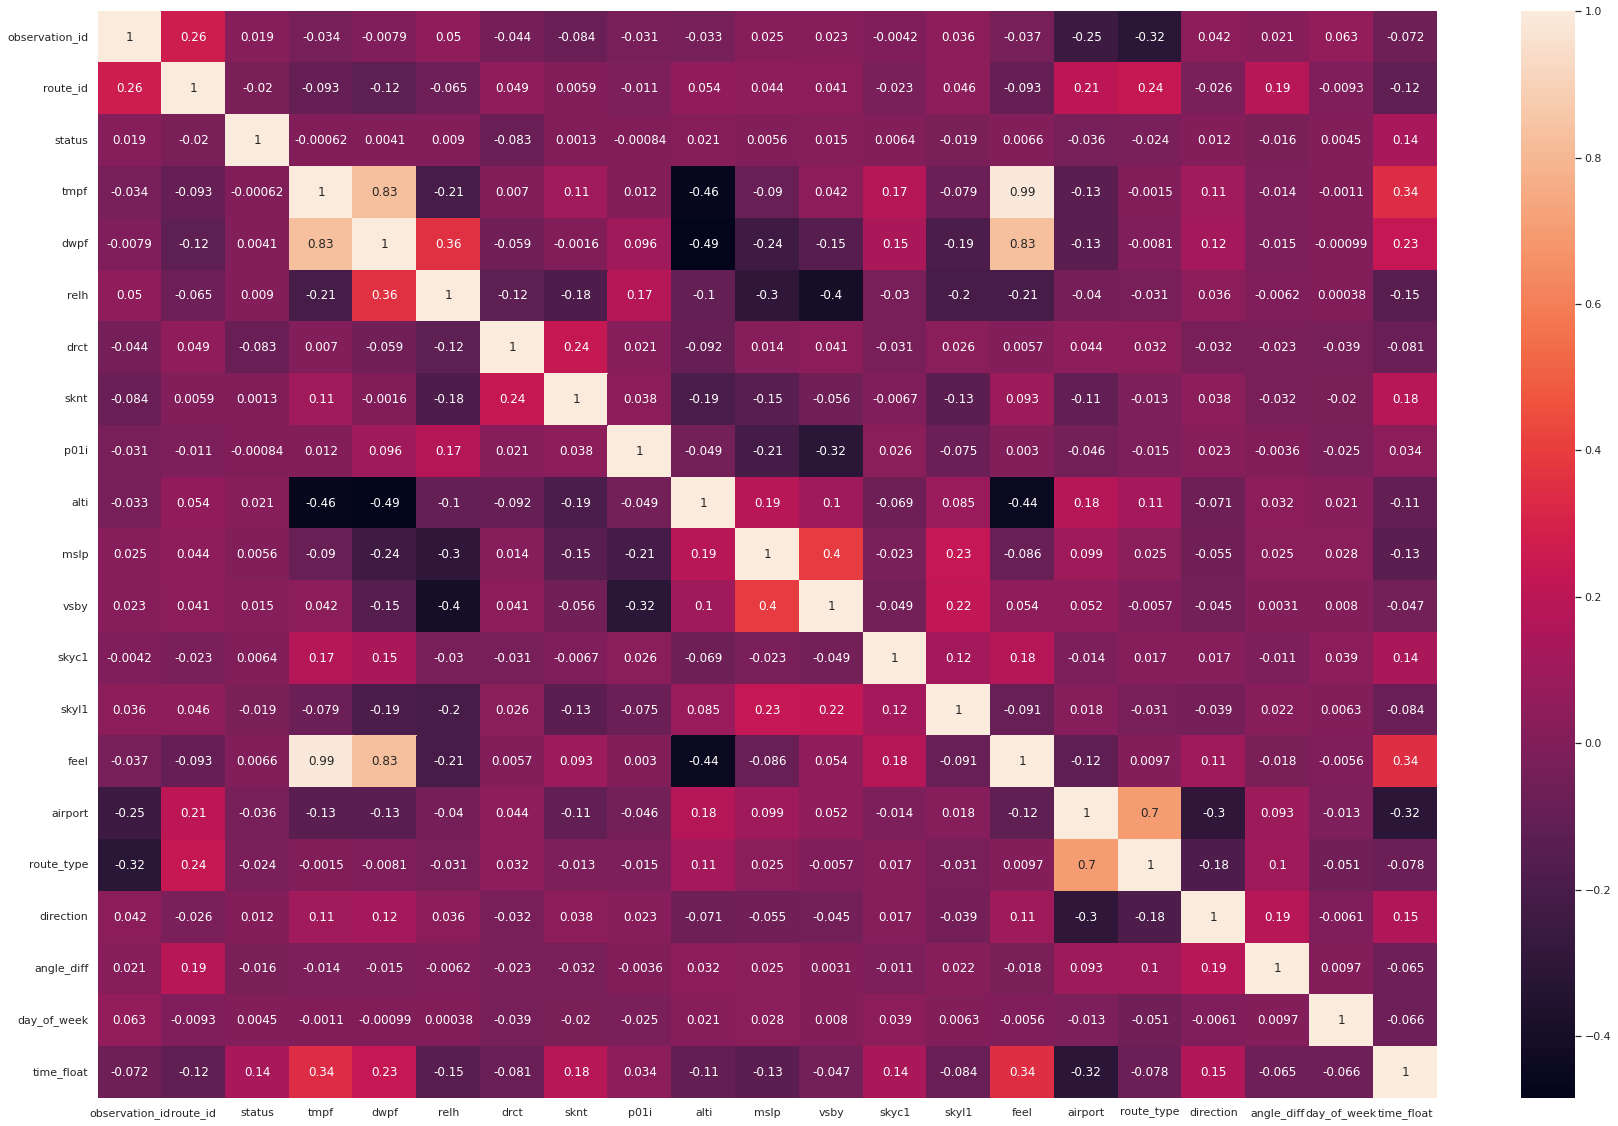

In [11]:
# Correlation Heatmap

fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(df_reduced.corr(), annot = True, ax=ax)
# plt.savefig('./plots/correlation_heatmap.png')
plt.show()

In [16]:
train_df, validation_df = train_test_split(df_reduced, test_size=0.2, random_state=42, shuffle=False)
train_df = train_df.sample(frac=1)

In [17]:
train_df.head()

,observation_id,route_id,status,tmpf,dwpf,relh,drct,sknt,p01i,alti,...,vsby,skyc1,skyl1,feel,airport,route_type,direction,angle_diff,day_of_week,time_float
5575,7698,109,1.0,57.9,46.0,64.47,10.0,3.0,0.0,30.04,...,10.0,4,17000.0,57.90,2,1,171,0.894444,3,11.236667
30888,47639,60,1.0,43.0,28.0,55.14,350.0,8.0,0.0,30.24,...,10.0,2,8000.0,37.66,2,1,1,0.061111,0,3.415833
37786,60871,105,1.0,71.1,63.0,75.58,120.0,5.0,0.0,29.92,...,10.0,1,0.0,71.10,0,0,207,0.483333,3,9.399167
21598,32755,118,0.0,54.0,42.1,63.98,30.0,14.0,0.0,30.20,...,10.0,1,0.0,54.00,2,1,179,0.827778,4,8.424722
41972,68609,126,0.0,48.0,45.0,89.29,290.0,7.0,0.0,29.69,...,10.0,2,20000.0,44.28,0,0,202,0.488889,4,7.361944


In [18]:
X_train = train_df.drop(['status'], axis=1)
y_train = train_df['status']

X_test = validation_df.drop(['status'], axis=1)
y_test = validation_df['status']

In [19]:
# Normalizing the all the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# K-fold splits
cv = StratifiedKFold(n_splits=5)

# Logistic regression

In [21]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    # 'penalty': ['l1','l2'],
    'C': [0.05,0.2,0.6,0.8,1,3,5,6,8]
}

# Building model
logreg = LogisticRegression(solver='liblinear')

# Parameter estimating using GridSearch
grid = GridSearchCV(logreg, param_grid=params, scoring='f1', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)
logreg_grid_val_score = grid.best_score_
print('Best Score:', logreg_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

logreg_grid = grid.best_estimator_
y_pred = logreg_grid.predict(X_test)

# Confusion matrix

print(pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"] ))
# Calculating metrics

logreg_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', logreg_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Score: 0.563371599862298
Best Params: {'C': 0.8}
Best Estimator: LogisticRegression(C=0.8, solver='liblinear')
          Predicted A  Predicted T
Actual A         2797         1789
Actual T         1842         2019
Model Accuracy: 0.5701432461228839
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.61      0.61      4586
         1.0       0.53      0.52      0.53      3861

    accuracy                           0.57      8447
   macro avg       0.57      0.57      0.57      8447
weighted avg       0.57      0.57      0.57      8447



# K-Nearest Neighbours 

In [22]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform','distance']
}

# Building model
knn = KNeighborsClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(knn, param_grid=params, scoring='f1', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

knn_grid_val_score = grid.best_score_
print('Best Score:', knn_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

knn_grid= grid.best_estimator_
y_pred = knn_grid.predict(X_test)

# Confusion matrix

print(pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"] ))

# Calculating metrics

knn_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', knn_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Score: 0.8206463692492036
Best Params: {'n_neighbors': 3, 'weights': 'uniform'}
Best Estimator: KNeighborsClassifier(n_neighbors=3)
          Predicted A  Predicted T
Actual A         3064         1522
Actual T         1573         2288
Model Accuracy: 0.6335977270036699
Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.67      0.66      4586
         1.0       0.60      0.59      0.60      3861

    accuracy                           0.63      8447
   macro avg       0.63      0.63      0.63      8447
weighted avg       0.63      0.63      0.63      8447



# Gaussian Naive Bayes

In [23]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# No such parameters for Gaussian Naive Bayes
params = {}

# Building model
gb = GaussianNB()

# Parameter estimating using GridSearch
grid = GridSearchCV(gb, param_grid=params, scoring='f1', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

gb_grid_val_score = grid.best_score_
print('Best Score:', gb_grid_val_score)
print('Best Estimator:', grid.best_estimator_)

# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)
gb_grid= grid.best_estimator_
y_pred = gb_grid.predict(X_test)

# Confusion matrix
print(pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"] ))

# Calculating metrics
gb_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', gb_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Score: 0.583865196083632
Best Estimator: GaussianNB()
          Predicted A  Predicted T
Actual A         2112         2474
Actual T         1401         2460
Model Accuracy: 0.5412572510950633
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.46      0.52      4586
         1.0       0.50      0.64      0.56      3861

    accuracy                           0.54      8447
   macro avg       0.55      0.55      0.54      8447
weighted avg       0.55      0.54      0.54      8447



# Decision Tree

In [24]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'max_features': [1, 3, 10],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'criterion': ["entropy", "gini"]
}

# Building model
dtc = DecisionTreeClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(dtc, param_grid=params, scoring='f1', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

dtc_grid_val_score = grid.best_score_
print('Best Score:', dtc_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)
dtc_grid= grid.best_estimator_
y_pred = dtc_grid.predict(X_test)

# Confusion matrix
print(pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"] ))

# Calculating metrics
dtc_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', dtc_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Score: 0.9406646611785098
Best Params: {'criterion': 'entropy', 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_features=10,
                       min_samples_split=3)
          Predicted A  Predicted T
Actual A         3346         1240
Actual T         1109         2752
Model Accuracy: 0.7219131052444655
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      4586
         1.0       0.69      0.71      0.70      3861

    accuracy                           0.72      8447
   macro avg       0.72      0.72      0.72      8447
weighted avg       0.72      0.72      0.72      8447



In [26]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    # 'max_features': [1, 3, 10],
    'max_features': [10],
    'min_samples_split': [10],
    # 'min_samples_leaf': [3, 10],
    # 'bootstrap': [False],
    'n_estimators' :[300],
    # 'criterion': ["entropy", "gini"]
}

# Building model
rfc = RandomForestClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(rfc, param_grid=params, scoring='f1', n_jobs =-1, cv=cv, verbose=3)

# Fitting the model
grid.fit(X_train, y_train)

rfc_grid_val_score = grid.best_score_
print('Best Score:', rfc_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)
rfc_grid= grid.best_estimator_
y_pred = rfc_grid.predict(X_test)

# Confusion matrix
print(pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"]))


# Calculating metrics
rfc_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', rfc_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Score: 0.95821382877056
Best Params: {'max_features': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best Estimator: RandomForestClassifier(max_features=10, min_samples_split=10, n_estimators=300)
          Predicted A  Predicted T
Actual A         3802          784
Actual T          593         3268
Model Accuracy: 0.8369835444536522
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      4586
         1.0       0.81      0.85      0.83      3861

    accuracy                           0.84      8447
   macro avg       0.84      0.84      0.84      8447
weighted avg       0.84      0.84      0.84      8447



In [30]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'max_depth': range (8, 10, 1),
    'n_estimators': range(180, 220, 40),
    'learning_rate': [0.1, 0.15]
}

# Building model
xgb = XGBClassifier(objective='binary:logistic')

# Parameter estimating using GridSearch
grid = GridSearchCV(xgb, param_grid=params, scoring='f1', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

xgb_grid_val_score = grid.best_score_
print('Best Score:', xgb_grid_val_score) 
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)
xgb_grid= grid.best_estimator_
y_pred = xgb_grid.predict(X_test)

# Confusion matrix
print(pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"]))

# Calculating metrics
xgb_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', xgb_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Score: 0.9918684360692731
Best Params: {'learning_rate': 0.15, 'max_depth': 9, 'n_estimators': 180}
Best Estimator: XGBClassifier(learning_rate=0.15, max_depth=9, n_estimators=180)
          Predicted A  Predicted T
Actual A         4400          186
Actual T          163         3698
Model Accuracy: 0.9586835562921747
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      4586
         1.0       0.95      0.96      0.95      3861

    accuracy                           0.96      8447
   macro avg       0.96      0.96      0.96      8447
weighted avg       0.96      0.96      0.96      8447



In [29]:
list(range(180,220,40))

[180]

In [31]:
score_df = pd.DataFrame(
    [
        ['Logistic Regression', logreg_grid_score, logreg_grid_val_score],
        ['K-Nearest Neighbors', knn_grid_score, knn_grid_val_score],
        ['Gaussian Naïve Bayes', gb_grid_score, gb_grid_val_score],
        ['Decision Tree Classifier', dtc_grid_score, dtc_grid_val_score],
        ['Random Forest Tree Classifier', rfc_grid_score, rfc_grid_val_score],
        ['GBM - XGBoost', xgb_grid_score, xgb_grid_val_score], 
    ],
    columns= ['Model', 'Test Score', 'Validation Score']
)
score_df['Test Score'] = score_df['Test Score']*100
score_df['Validation Score'] = score_df['Validation Score']*100

In [32]:
score_df

,Model,Test Score,Validation Score
0,Logistic Regression,57.014325,56.337160
1,K-Nearest Neighbors,63.359773,82.064637
2,Gaussian Naïve Bayes,54.125725,58.386520
3,Decision Tree Classifier,72.191311,94.066466
4,Random Forest Tree Classifier,83.698354,95.821383
5,GBM - XGBoost,95.868356,99.186844


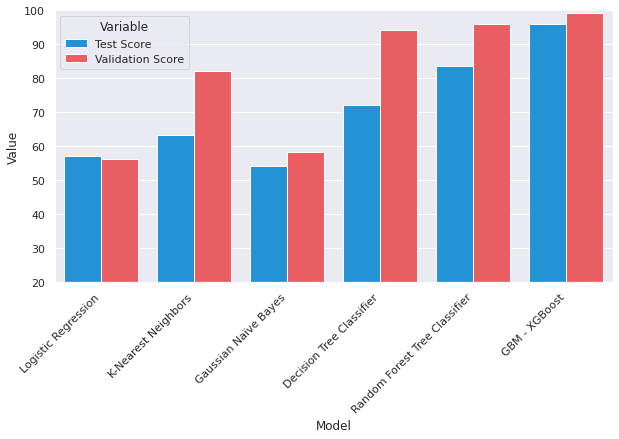

In [35]:
fig, ax1 = plt.subplots(figsize=(10, 5))
tidy = score_df.melt(id_vars='Model').rename(columns=str.title)
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy, ax=ax1, palette=sns.xkcd_palette(["azure", "light red"]))
plt.ylim(20, 100)
plt.xticks(rotation=45, horizontalalignment="right")
plt.savefig('./compare_models_and_hparams_result.png')
sns.despine(fig)

In [ ]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'max_features': [1, 3, 10],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'criterion': ["entropy", "gini"]
}

# Building model
dtc = DecisionTreeClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(dtc, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

dtc_grid_val_score = grid.best_score_
print('Best Score:', dtc_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

dtc_grid= grid.best_estimator_
y_pred = dtc_grid.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Score: 0.8540212730258114
Best Params: {'criterion': 'entropy', 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_features=10)


In [ ]:
cv

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"] )

# Calculating metrics
dtc_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', dtc_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.6930752584755951
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.70      0.71      4513
         1.0       0.66      0.69      0.67      3805

    accuracy                           0.69      8318
   macro avg       0.69      0.69      0.69      8318
weighted avg       0.69      0.69      0.69      8318



In [ ]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'max_depth': range (9, 20, 1),
    'n_estimators': range(120, 260, 40),
    'learning_rate': [0.1, 0.2, 0.15]
}

# Building model
xgb = XGBClassifier(objective='binary:logistic')

# Parameter estimating using GridSearch
grid = GridSearchCV(xgb, param_grid=params, scoring='f1', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

xgb_grid_val_score = grid.best_score_
print('Best Score:', xgb_grid_val_score) 
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

xgb_grid= grid.best_estimator_
y_pred = xgb_grid.predict(X_test)

# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"] )

Fitting 5 folds for each of 132 candidates, totalling 660 fits
Best Score: 0.9106993295088743
Best Params: {'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 240}
Best Estimator: XGBClassifier(learning_rate=0.2, max_depth=15, n_estimators=240)


,Predicted A,Predicted T
Actual A,3370,1143
Actual T,1010,2795


In [ ]:
# Calculating metrics

xgb_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', xgb_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.7383986535224814
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.73      0.75      4513
         1.0       0.70      0.75      0.72      3805

    accuracy                           0.74      8318
   macro avg       0.74      0.74      0.74      8318
weighted avg       0.74      0.74      0.74      8318



In [ ]:
# With scoring as f1

# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

# Building model
xgb = XGBClassifier(objective='binary:logistic')

# Parameter estimating using GridSearch
grid = GridSearchCV(xgb, param_grid=params, scoring='f1', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

xgb_grid_val_score = grid.best_score_
print('Best Score:', xgb_grid_val_score) 
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

xgb_grid= grid.best_estimator_
y_pred = xgb_grid.predict(X_test)

# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"])


# Calculating metrics

xgb_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', xgb_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Score: 0.896895243450559
Best Params: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}
Best Estimator: XGBClassifier(max_depth=9, n_estimators=180)
Model Accuracy: 0.7383986535224814
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.73      0.75      4513
         1.0       0.70      0.75      0.72      3805

    accuracy                           0.74      8318
   macro avg       0.74      0.74      0.74      8318
weighted avg       0.74      0.74      0.74      8318



In [ ]:
score_df = pd.DataFrame(
    [
        ['Logistic Regression', logreg_grid_score, logreg_grid_val_score],
        ['K-Nearest Neighbors', knn_grid_score, knn_grid_val_score],
        ['Gaussian Naïve Bayes', gb_grid_score, gb_grid_val_score],
        # ['Support Vector Machines', svm_grid_score, svm_grid_val_score],
        ['Decision Tree Classifier', dtc_grid_score, dtc_grid_val_score],
        ['Random Forest Tree Classifier', rfc_grid_score, rfc_grid_val_score],
        # ['Artificial Neural Networks', nn_grid_score, nn_grid_val_score],
        ['GBM - XGBoost', xgb_grid_score, xgb_grid_val_score], 
    ],
    columns= ['Model', 'Test Score', 'Validation Score']
)
score_df['Test Score'] = score_df['Test Score']*100
score_df['Validation Score'] = score_df['Validation Score']*100

In [ ]:
score_df

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))
tidy = score_df.melt(id_vars='Model').rename(columns=str.title)
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy, ax=ax1, palette=sns.xkcd_palette(["azure", "light red"]))
plt.ylim(20, 90)
plt.xticks(rotation=45, horizontalalignment="right")
# plt.savefig('./plots/result.png')
sns.despine(fig)